## Setup

In [274]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

The data: Protein quantity measurements of brain tissue samples from multiple regions.

Here we read in the data, store a feature for visualization later, and drop non-numeric features from the dataset.

In [291]:
filepath = "/home/ramya/my-workspace/src/feeding_study_cleanup/scripts/action_schema_data (3).csv"
data = pd.read_csv(filepath)
print("original shape: ",data.shape)


# Drop the rows aren't skewered items. Using substrings due to naming
# inconsistencies (e.g., doughnutholes vs. donutholes)
skewered_item_substrings = [
    "chicken",
    "broc",
    "fri",
    "bagel",
    "nut",
    "lettuce",
    "spinach",
    "sand",
    "pizza",
]

rows_to_drop = []
#for i, row in data.iterrows():
#    is_skewered = False
#    for substr in skewered_item_substrings:
#        if substr in row["Bag File Name"]:
#            is_skewered = True
#            break
            
#    if not is_skewered:
#        rows_to_drop.append(i)

# Drop outliers 
# 3-fries-4
# 8-broccoli-5
# 3-chicken-1
for i, row in data.iterrows():
    is_skewered = False
    #if  "noodle" in row["Bag File Name"]:
    #    continue
        #rows_to_drop.append(i)
    if  "3-fries-4" in row["Bag File Name"]:
        rows_to_drop.append(i)
    if  "3-chicken-1" in row["Bag File Name"]:
        rows_to_drop.append(i)
    if  "5-pizza-3" in row["Bag File Name"]:
        rows_to_drop.append(i)
    if  "9-noodles-4" in row["Bag File Name"]:
        rows_to_drop.append(i)
    if  "9-noodles-2" in row["Bag File Name"]:
        rows_to_drop.append(i)
    if  "9-noodles-3" in row["Bag File Name"]:
        rows_to_drop.append(i)
    #rows_to_drop.append(i)
        
data  = data.drop(rows_to_drop, axis=0)
print("after dropping non-skewered and outliers ", data.shape)

        
# Drop any row containing nan or inf
data = data[np.all(data != np.nan, axis=1)]
data = data[np.all(data != np.inf, axis=1)]
data = data[np.all(data != -np.inf, axis=1)]
print("after dropping nan, inf: ",data.shape)


# create list for hues in graphs
names = (data["Bag File Name"]).copy()
names = names.tolist()
# Replace bag files names with food substrings
names = ["chicken" if "chicken" in x else x for x in names]
names = ["broc" if "broc" in x else x for x in names]
names = ["fri" if "fri" in x else x for x in names]
names = ["bagel" if "bagel" in x else x for x in names]
names = ["nut" if "nut" in x else x for x in names]
names = ["lettuce" if "lettuce" in x else x for x in names]
names = ["spinach" if "spinach" in x else x for x in names]
names = ["sand" if "sand" in x else x for x in names]
names = ["pizza" if "pizza" in x else x for x in names]
# nonskewered
names = ["potato" if "potato" in x else x for x in names]
names = ["rice" if "rice" in x else x for x in names]
names = ["noodle" if "noodle" in x else x for x in names]
names = ["jello" if "jello" in x else x for x in names]


# create list for hues in graphs
participants = (data["Bag File Name"]).copy()
participants = participants.tolist()
# Replace bag files names with participant substrings
participants = ["1" if x.startswith( '1' ) else x for x in participants]
participants = ["2" if x.startswith( '2' ) else x for x in participants]
participants = ["3" if x.startswith( '3' ) else x for x in participants]
participants = ["4" if x.startswith( '4' ) else x for x in participants]
participants = ["5" if x.startswith( '5' ) else x for x in participants]
participants = ["6" if x.startswith( '6' ) else x for x in participants]
participants = ["7" if x.startswith( '7' ) else x for x in participants]
participants = ["8" if x.startswith( '8' ) else x for x in participants]
participants = ["9" if x.startswith( '9' ) else x for x in participants]


# Drop the columns that aren't part of the action schema except Bag File Name 
# This is so we can calculate mean and stdev
data_averages  = data.drop([
    "Participant",
    "Trial",
    "Food",
    "Save Timestamp",
    "Action Start Time",
    "Action Contact Time",
    "Action Extraction Time",
    "Action End Time",
    "Bag Duration",
    "Food Reference Frame Translation X",
    "Food Reference Frame Translation Y",
    "Food Reference Frame Translation Z",
    "Food Reference Frame Rotation X",
    "Food Reference Frame Rotation Y",
    "Food Reference Frame Rotation Z",
], axis=1)

# Drop Bag File Name for PCA
data  = data.drop([
    "Participant",
    "Food",
    "Trial",
    "Bag File Name",
    "Save Timestamp",
    "Action Start Time",
    "Action Contact Time",
    "Action Extraction Time",
    "Action End Time",
    "Bag Duration",
    "Food Reference Frame Translation X",
    "Food Reference Frame Translation Y",
    "Food Reference Frame Translation Z",
    "Food Reference Frame Rotation X",
    "Food Reference Frame Rotation Y",
    "Food Reference Frame Rotation Z",
], axis=1)
print("after non number columns ", data.shape)



# Replace with substrings for mean and stdev
data_averages.loc[data_averages['Bag File Name'].str.contains('chicken'), 'Bag File Name'] = 'chicken'
data_averages.loc[data_averages['Bag File Name'].str.contains('broc'), 'Bag File Name'] = 'broc'
data_averages.loc[data_averages['Bag File Name'].str.contains('fri'), 'Bag File Name'] = 'fri'
data_averages.loc[data_averages['Bag File Name'].str.contains('bagel'), 'Bag File Name'] = 'bagel'
data_averages.loc[data_averages['Bag File Name'].str.contains('nut'), 'Bag File Name'] = 'nut'
data_averages.loc[data_averages['Bag File Name'].str.contains('lettuce'), 'Bag File Name'] = 'lettuce'
data_averages.loc[data_averages['Bag File Name'].str.contains('spinach'), 'Bag File Name'] = 'spinach'
data_averages.loc[data_averages['Bag File Name'].str.contains('sand'), 'Bag File Name'] = 'sand'
data_averages.loc[data_averages['Bag File Name'].str.contains('pizza'), 'Bag File Name'] = 'pizza'
# replace the nonskwered
data_averages.loc[data_averages['Bag File Name'].str.contains('potato'), 'Bag File Name'] = 'potato'
data_averages.loc[data_averages['Bag File Name'].str.contains('rice'), 'Bag File Name'] = 'rice'
data_averages.loc[data_averages['Bag File Name'].str.contains('noodle'), 'Bag File Name'] = 'noodle'
data_averages.loc[data_averages['Bag File Name'].str.contains('jello'), 'Bag File Name'] = 'jello'
data_averages.shape



original shape:  (412, 42)
after dropping non-skewered and outliers  (406, 42)
after dropping nan, inf:  (400, 42)
after non number columns  (400, 26)


(400, 27)

The other columns indicate the amount of a protein present in that brain tissue sample.

## Pre-processing

In [306]:
data_averages_mean = data_averages.copy()
print(data_averages_mean.shape)

list_columns = list(data_averages_mean.columns)
print(list_columns)
list_columns.remove('Bag File Name')
print(list_columns)

data_averages_mean = data_averages_mean.groupby(['Bag File Name'])[list_columns].mean()
data_averages_mean.insert(0, "Calc", "Mean")

print(data_averages_mean.shape)
data_averages_mean

(400, 27)
['Bag File Name', 'Pre-Grasp Target Offset X', 'Pre-Grasp Target Offset Y', 'Pre-Grasp Target Offset Z', 'Pre-Grasp Initial Utensil Transform Translation X', 'Pre-Grasp Initial Utensil Transform Translation Y', 'Pre-Grasp Initial Utensil Transform Translation Z', 'Pre-Grasp Initial Utensil Transform Rotation X', 'Pre-Grasp Initial Utensil Transform Rotation Y', 'Pre-Grasp Initial Utensil Transform Rotation Z', 'Pre-Grasp Force Threshold', 'Grasp In-Food Twist Linear X', 'Grasp In-Food Twist Linear Y', 'Grasp In-Food Twist Linear Z', 'Grasp In-Food Twist Angular X', 'Grasp In-Food Twist Angular Y', 'Grasp In-Food Twist Angular Z', 'Grasp Force Threshold', 'Grasp Torque Threshold', 'Grasp Duration', 'Extraction Out-Of-Food Twist Linear X', 'Extraction Out-Of-Food Twist Linear Y', 'Extraction Out-Of-Food Twist Linear Z', 'Extraction Out-Of-Food Twist Angular X', 'Extraction Out-Of-Food Twist Angular Y', 'Extraction Out-Of-Food Twist Angular Z', 'Extraction Duration']
['Pre-Grasp

,Calc,Pre-Grasp Target Offset X,Pre-Grasp Target Offset Y,Pre-Grasp Target Offset Z,Pre-Grasp Initial Utensil Transform Translation X,Pre-Grasp Initial Utensil Transform Translation Y,Pre-Grasp Initial Utensil Transform Translation Z,Pre-Grasp Initial Utensil Transform Rotation X,Pre-Grasp Initial Utensil Transform Rotation Y,Pre-Grasp Initial Utensil Transform Rotation Z,Pre-Grasp Force Threshold,Grasp In-Food Twist Linear X,Grasp In-Food Twist Linear Y,Grasp In-Food Twist Linear Z,Grasp In-Food Twist Angular X,Grasp In-Food Twist Angular Y,Grasp In-Food Twist Angular Z,Grasp Force Threshold,Grasp Torque Threshold,Grasp Duration,Extraction Out-Of-Food Twist Linear X,Extraction Out-Of-Food Twist Linear Y,Extraction Out-Of-Food Twist Linear Z,Extraction Out-Of-Food Twist Angular X,Extraction Out-Of-Food Twist Angular Y,Extraction Out-Of-Food Twist Angular Z,Extraction Duration
Bag File Name,,,,,,,,,,,,,,,,,,,,,,,,,,,
bagel,Mean,0.002144,0.009080,0.006673,0.026362,0.067645,0.129160,1.037058,-0.235420,-0.103904,3.284917,0.000926,0.003681,0.015326,-0.048395,0.019277,-0.051222,28.643876,0.011613,1.694651,-0.086182,-0.003427,-0.215206,-0.911888,-0.631625,1.101515,0.156661
broc,Mean,0.001421,0.006231,0.008178,-0.016235,0.084003,0.113302,2.366624,-0.112362,-0.635990,3.584646,0.005109,0.004438,0.024115,-0.002818,0.157851,-0.000448,39.344496,0.011181,1.289730,-0.052309,0.017919,-0.225024,-1.140144,-0.606628,0.815897,0.157700
chicken,Mean,0.001363,0.008623,-0.004143,0.014064,0.087745,0.122333,2.411397,-0.211494,-0.382429,3.540934,0.006945,0.008959,0.022333,-0.012764,0.129941,0.092757,24.277222,0.010095,0.944482,-0.070426,0.038969,-0.243345,-1.241220,-0.553611,0.234858,0.168055
fri,Mean,-0.005128,0.009045,0.001042,-0.024720,0.054159,0.120569,2.130477,0.005665,-0.366061,1.908855,0.003026,0.006547,0.029242,-0.018052,0.141362,0.019568,20.173018,0.006372,1.559644,-0.023914,0.015917,-0.193086,-0.860654,-0.633588,0.302954,0.242335
jello,Mean,0.010501,0.004646,0.003541,-0.005999,0.070050,0.124847,2.348803,-0.213493,-0.548689,2.139752,-0.001280,0.005882,0.007943,-0.240559,0.065648,0.424067,5.109746,0.005100,4.010359,0.006602,0.073522,-0.065035,-1.091216,0.198092,0.706990,0.596545
lettuce,Mean,0.008157,0.007263,0.002470,0.007402,0.055708,0.131823,1.948064,-0.066761,-0.611657,3.289333,0.003754,0.004072,0.021631,-0.084219,0.089284,0.102220,37.267287,0.012575,1.842900,-0.029750,0.045762,-0.196078,-1.285654,-0.342578,0.888091,0.181285
noodle,Mean,0.005335,0.013684,0.001975,-0.018318,0.082553,0.126653,2.290349,0.023030,-0.122140,2.407709,0.012819,0.025401,0.039131,-0.232366,0.178903,0.173696,3.400125,0.002705,3.171770,0.002250,0.113439,-0.088711,-1.213598,0.012913,0.815457,0.275020
nut,Mean,0.000368,0.004078,0.008953,0.021544,0.034842,0.123338,1.308797,-0.208511,-0.439080,1.839402,0.009207,0.008817,0.019383,0.005737,0.124520,0.012152,20.121571,0.009434,1.339069,-0.079020,0.024640,-0.225391,-0.878249,-0.532364,0.771703,0.132806
pizza,Mean,0.005627,0.001663,0.003747,0.031150,0.042690,0.104429,1.197161,-0.251546,-0.554198,4.847618,0.010428,0.009335,0.022908,-0.045975,0.140952,-0.038914,34.868936,0.012578,1.143868,-0.083761,0.046568,-0.276446,-1.107464,-0.837930,0.859261,0.187106


In [307]:
data_averages_std = data_averages.copy()
data_averages_std = data_averages_std.groupby('Bag File Name').std()
data_averages_std.insert(0, "Calc", "Stdev")

data_averages_std

,Calc,Pre-Grasp Target Offset X,Pre-Grasp Target Offset Y,Pre-Grasp Target Offset Z,Pre-Grasp Initial Utensil Transform Translation X,Pre-Grasp Initial Utensil Transform Translation Y,Pre-Grasp Initial Utensil Transform Translation Z,Pre-Grasp Initial Utensil Transform Rotation X,Pre-Grasp Initial Utensil Transform Rotation Y,Pre-Grasp Initial Utensil Transform Rotation Z,Pre-Grasp Force Threshold,Grasp In-Food Twist Linear X,Grasp In-Food Twist Linear Y,Grasp In-Food Twist Linear Z,Grasp In-Food Twist Angular X,Grasp In-Food Twist Angular Y,Grasp In-Food Twist Angular Z,Grasp Force Threshold,Grasp Torque Threshold,Grasp Duration,Extraction Out-Of-Food Twist Linear X,Extraction Out-Of-Food Twist Linear Y,Extraction Out-Of-Food Twist Linear Z,Extraction Out-Of-Food Twist Angular X,Extraction Out-Of-Food Twist Angular Y,Extraction Out-Of-Food Twist Angular Z,Extraction Duration
Bag File Name,,,,,,,,,,,,,,,,,,,,,,,,,,,
bagel,Stdev,0.019535,0.009044,0.012276,0.103947,0.066315,0.059831,2.682735,0.432451,1.696103,4.234282,0.022940,0.016686,0.016549,0.462845,0.268419,1.433457,10.093408,0.007069,1.651547,0.116324,0.098407,0.080748,1.558067,1.425249,1.085216,0.093184
broc,Stdev,0.027913,0.019400,0.020242,0.082241,0.068392,0.054207,1.352760,0.297278,1.082677,7.011923,0.017506,0.015380,0.021943,0.340414,0.145335,0.373504,11.151082,0.009383,0.589752,0.096478,0.104619,0.091454,1.485124,1.392753,1.147897,0.068434
chicken,Stdev,0.026901,0.014643,0.010067,0.090076,0.065668,0.056190,1.437684,0.376108,1.346565,6.527646,0.023178,0.026715,0.023292,0.298072,0.249240,1.101618,11.081665,0.008965,0.495997,0.131507,0.151269,0.122859,1.730895,1.103490,1.153406,0.115914
fri,Stdev,0.025470,0.015650,0.007277,0.092217,0.065379,0.045558,1.758931,0.452600,1.565128,0.185271,0.014836,0.014553,0.020508,0.236698,0.200494,0.302307,15.685866,0.004067,1.654088,0.114732,0.114715,0.125931,1.785988,1.029438,1.079560,0.236554
jello,Stdev,0.017328,0.012869,0.018014,0.075459,0.063827,0.049791,1.052844,0.593502,1.354685,0.812611,0.013274,0.015233,0.015872,0.496722,0.224135,0.492964,2.857197,0.003357,3.925541,0.040180,0.065577,0.062806,1.093262,0.453865,0.759914,0.471909
lettuce,Stdev,0.028022,0.021426,0.014834,0.104865,0.058438,0.066199,1.939565,0.399761,1.425719,5.186911,0.015539,0.015143,0.016821,0.231474,0.136331,0.195938,14.520402,0.008740,1.197073,0.079119,0.085592,0.086594,1.515950,1.230680,0.828461,0.064849
noodle,Stdev,0.031044,0.022675,0.013160,0.112986,0.074864,0.063331,1.514720,0.437260,0.954446,2.015340,0.027422,0.026531,0.041179,0.230820,0.236843,0.309567,2.062060,0.001980,3.039527,0.063215,0.091295,0.049217,0.810407,0.716771,1.648937,0.179021
nut,Stdev,0.016744,0.012889,0.009281,0.108017,0.055640,0.061961,2.469153,0.453529,1.577469,0.237452,0.009240,0.009087,0.008957,0.142427,0.123168,0.141890,4.492845,0.007498,0.674124,0.125605,0.116427,0.078441,1.493826,1.131393,0.778429,0.061864
pizza,Stdev,0.026033,0.019617,0.013366,0.098013,0.052757,0.058185,2.542332,0.380172,1.406081,10.958333,0.016058,0.012851,0.024064,0.218771,0.149561,0.321038,12.889182,0.010514,0.733423,0.142997,0.200108,0.122149,1.894949,1.017990,0.966959,0.288132


In [309]:
thing = pd.concat([data_averages_mean, data_averages_std]).sort_values(by=['Bag File Name'])
#thing.to_csv("meanstd.csv",index=False)
thing


,Calc,Pre-Grasp Target Offset X,Pre-Grasp Target Offset Y,Pre-Grasp Target Offset Z,Pre-Grasp Initial Utensil Transform Translation X,Pre-Grasp Initial Utensil Transform Translation Y,Pre-Grasp Initial Utensil Transform Translation Z,Pre-Grasp Initial Utensil Transform Rotation X,Pre-Grasp Initial Utensil Transform Rotation Y,Pre-Grasp Initial Utensil Transform Rotation Z,Pre-Grasp Force Threshold,Grasp In-Food Twist Linear X,Grasp In-Food Twist Linear Y,Grasp In-Food Twist Linear Z,Grasp In-Food Twist Angular X,Grasp In-Food Twist Angular Y,Grasp In-Food Twist Angular Z,Grasp Force Threshold,Grasp Torque Threshold,Grasp Duration,Extraction Out-Of-Food Twist Linear X,Extraction Out-Of-Food Twist Linear Y,Extraction Out-Of-Food Twist Linear Z,Extraction Out-Of-Food Twist Angular X,Extraction Out-Of-Food Twist Angular Y,Extraction Out-Of-Food Twist Angular Z,Extraction Duration
Bag File Name,,,,,,,,,,,,,,,,,,,,,,,,,,,
bagel,Mean,0.002144,0.009080,0.006673,0.026362,0.067645,0.129160,1.037058,-0.235420,-0.103904,3.284917,0.000926,0.003681,0.015326,-0.048395,0.019277,-0.051222,28.643876,0.011613,1.694651,-0.086182,-0.003427,-0.215206,-0.911888,-0.631625,1.101515,0.156661
bagel,Stdev,0.019535,0.009044,0.012276,0.103947,0.066315,0.059831,2.682735,0.432451,1.696103,4.234282,0.022940,0.016686,0.016549,0.462845,0.268419,1.433457,10.093408,0.007069,1.651547,0.116324,0.098407,0.080748,1.558067,1.425249,1.085216,0.093184
broc,Mean,0.001421,0.006231,0.008178,-0.016235,0.084003,0.113302,2.366624,-0.112362,-0.635990,3.584646,0.005109,0.004438,0.024115,-0.002818,0.157851,-0.000448,39.344496,0.011181,1.289730,-0.052309,0.017919,-0.225024,-1.140144,-0.606628,0.815897,0.157700
broc,Stdev,0.027913,0.019400,0.020242,0.082241,0.068392,0.054207,1.352760,0.297278,1.082677,7.011923,0.017506,0.015380,0.021943,0.340414,0.145335,0.373504,11.151082,0.009383,0.589752,0.096478,0.104619,0.091454,1.485124,1.392753,1.147897,0.068434
chicken,Mean,0.001363,0.008623,-0.004143,0.014064,0.087745,0.122333,2.411397,-0.211494,-0.382429,3.540934,0.006945,0.008959,0.022333,-0.012764,0.129941,0.092757,24.277222,0.010095,0.944482,-0.070426,0.038969,-0.243345,-1.241220,-0.553611,0.234858,0.168055
chicken,Stdev,0.026901,0.014643,0.010067,0.090076,0.065668,0.056190,1.437684,0.376108,1.346565,6.527646,0.023178,0.026715,0.023292,0.298072,0.249240,1.101618,11.081665,0.008965,0.495997,0.131507,0.151269,0.122859,1.730895,1.103490,1.153406,0.115914
fri,Mean,-0.005128,0.009045,0.001042,-0.024720,0.054159,0.120569,2.130477,0.005665,-0.366061,1.908855,0.003026,0.006547,0.029242,-0.018052,0.141362,0.019568,20.173018,0.006372,1.559644,-0.023914,0.015917,-0.193086,-0.860654,-0.633588,0.302954,0.242335
fri,Stdev,0.025470,0.015650,0.007277,0.092217,0.065379,0.045558,1.758931,0.452600,1.565128,0.185271,0.014836,0.014553,0.020508,0.236698,0.200494,0.302307,15.685866,0.004067,1.654088,0.114732,0.114715,0.125931,1.785988,1.029438,1.079560,0.236554
jello,Mean,0.010501,0.004646,0.003541,-0.005999,0.070050,0.124847,2.348803,-0.213493,-0.548689,2.139752,-0.001280,0.005882,0.007943,-0.240559,0.065648,0.424067,5.109746,0.005100,4.010359,0.006602,0.073522,-0.065035,-1.091216,0.198092,0.706990,0.596545


Next, let's normalize the data using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 

This is important because PCA picks the dimensions (linear combinations of the features) that **maximize variance**. We want this procedure to be agnostic to the units of the dataset. For example, let's say one column had units `km` and you then change it to `cm`. The variance of that column will now jump up 100x, and therefore PCA will put more weight on that column. This is undesirable because nothing has fundamentally changed amongst the dataset. To avoid this behavior, we normalize the data before inputting it into PCA.

In [279]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

clean_data = imp_mean.fit_transform(data)
print(np.any(np.isnan(clean_data)))

False


In [280]:
# Not really necessary in our case, but we leave it in anyway
clean_data = StandardScaler().fit_transform(data)
clean_data

array([[-1.46149211, -0.25273238,  0.63710689, ..., -0.40779639,
         0.24334646, -0.62517387],
       [ 0.43077919, -0.68144437,  0.22574345, ...,  0.49801582,
        -0.33275794, -0.54490853],
       [-0.42158651,  0.06926303,  0.35878359, ..., -0.63392081,
         0.40448406, -0.30465752],
       ...,
       [-1.11568922, -0.80470675,  0.314487  , ...,  0.93848817,
         0.28376264, -0.38451077],
       [ 0.88218474, -0.78228332, -1.31320599, ...,  2.40807153,
         1.40638987, -0.38456718],
       [ 2.53821677, -0.35460325, -0.01567831, ...,  0.80043548,
        -0.90870268, -0.22408527]])

##  PCA

Finally, we set-up our [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) model, fit it, and transform the data (embed it in low dimensional space)

In [281]:
pca = PCA(n_components=3)
pca.fit(clean_data)
transformed = pca.transform(clean_data)
clean_data.shape

(400, 26)

We can see how much variance each PC explains. Select the first 5 components.

In [282]:
# Display the explained variance ratio of the first 5 PCs
print(pca.explained_variance_ratio_[0:5])
# What is the total ratio of the variance this explains?
print(pca.explained_variance_ratio_[0:5].sum())

[0.1422309  0.12588898 0.09758642]
0.3657063030958342


**Question**: What ratio of the total variance would be explained by the first 29 components?

In [283]:
print(pca.explained_variance_ratio_[0:29].sum())

0.3657063030958342


## Plots

Here we see that two main clusters are apparent in this low dimensional space

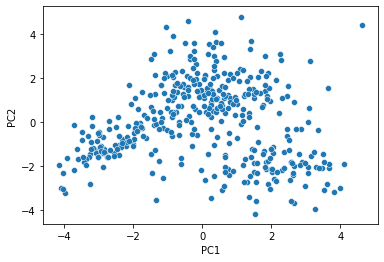

In [284]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Question**: Did we just do clustering using PCA? Why or why not?

After coloring by brain region, we can see that the islands represent the difference between the hippocampus and other brain regions

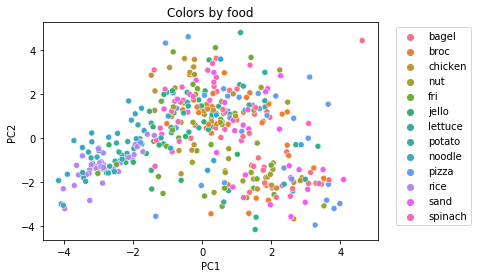

[ 0.42305724  0.63584719  0.99760917  1.19811764 -0.79441496 -0.20617631
  0.61658347 -0.19335478  0.061217   -0.84693444 -0.14322587 -0.5449288
 -1.75605317  1.81225123  1.81930495  0.4745169   0.07132953 -2.3275867
 -0.10101464 -1.84709285 -1.19083348 -1.94775232 -1.76527005 -2.13799016
  1.06597047 -1.06903657  3.64820426  0.74103088 -2.57545664 -3.26680434
 -3.99067405  1.89271914  1.38145962  1.1325155   1.51136838  0.11387361
  0.2639784  -1.4826232  -0.27339274 -0.11752433 -1.38278291 -0.61992877
 -1.40998758 -2.21894523 -1.81188322 -1.48103052 -0.39111885 -1.95795011
 -2.4298857  -2.16548548 -2.45908858 -2.41074035 -2.97786757 -2.83172358
 -0.75963751 -0.74671577 -3.27003202 -3.11698038 -3.28627535 -2.43099088
 -0.18182105  1.18361548 -0.87923336 -1.33308817 -1.17918452  1.62335159
  3.14086934  2.44584701  1.91654353  1.85185003 -1.02911138  1.97833642
  2.65171475  1.48410283  2.05596355  0.65898658  1.99853662  0.33935125
  1.84293001  1.48595312 -1.27239349  0.29567345 -0.0

In [285]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=names)
plt.title("Colors by food")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()
print(transformed[:,0])
print(transformed[:,1])

**Question**: How can we interpret this result, in light of what our dataset represents?

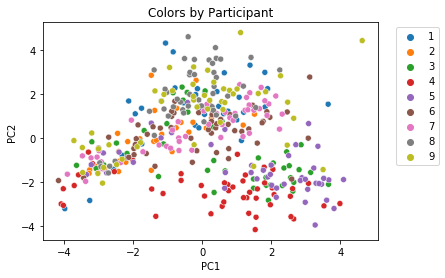

In [286]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=participants)
plt.title("Colors by Participant")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

We can look at other PCs as well. There are outliers that become apparent here!

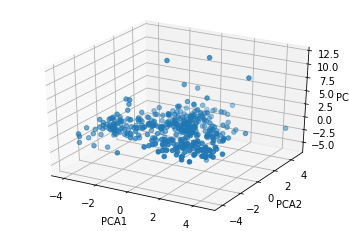

In [287]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = transformed[:,0]
y = transformed[:,1]
z = transformed[:,2]

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

ax.scatter(x, y, z)

plt.show()

**Question**: Why was PCA helpful for this problem (why did we use it)?